In [1]:
using IntervalArithmetic,IntervalBoxes,IntervalArithmetic.Symbols,Plots,ForwardDiff,LinearAlgebra,Roots

0.20616466713990816
0.6048926860909213


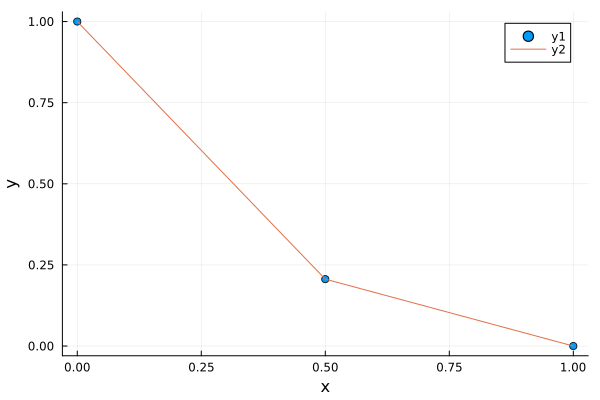

In [4]:
begin
    x=0.5
    g=9.8
    f(y) = 2*(√(x^2 + (1-y)^2)/√(2*g*(1-y)) + √((1-x)^2 + y^2)/(√(2*g*(1-y)) + √(2*g)));
    fdash(y) = ForwardDiff.derivative(f, y);
    fd(y) =  ForwardDiff.derivative(fdash, y);
    y=0
    while true
        ynew = y - fdash(y)/fd(y)
        if abs(ynew - y) < 0.00001
            println(ynew)
            println(f(ynew))
            break
        else
            y = ynew
        end
  
    end
    y0 = vcat(1, y, 0)
    x = vcat(0,x,1)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end

In [13]:
using ForwardDiff

# Constants
x1 = 1/3
x2 = 2/3
h = 1
g = 9.8
x = [1/3,2/3]
# Function definition
f1(y1, y2) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt(y2^2 + (x2 - h)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * h))

# Derivative functions
fdash1(y1, y2) = ForwardDiff.derivative(y -> f1(y, y2), y1)
fdash2(y1, y2) = ForwardDiff.derivative(y -> f1(y1, y), y2)

# Initial guess
y0 = [0.1, 0.0]

# Function to return the vector of derivatives
f0(y) = [fdash1(y[1], y[2]), fdash2(y[1], y[2])]

# Newton's method loop
while true
    J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
    if norm(f0(y0)) < 0.0001  # Check the norm of the function
        println("Solution found: ", y0)
        break
    else
        y0 = y0 - inv(J) * f0(y0)
    end
end

Solution found: [0.35886977818489324, 0.13661175198231584]


Converged solution: [0.3588657815936687, 0.13661311744833685]
0.5966717221533048


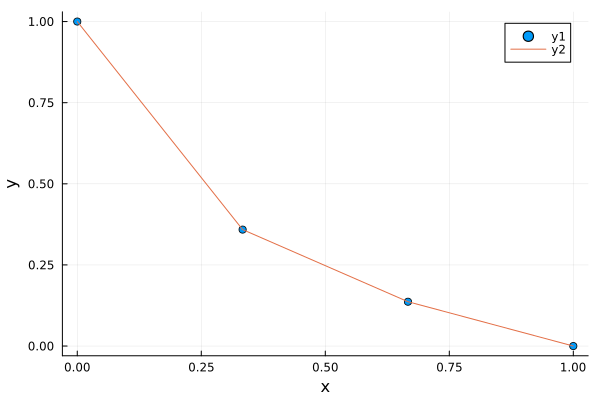

In [5]:

begin
    # Constants
    x1 = 1 / 3
    x2 = 2 / 3
    h = 1
    g = 9.8
    x = [0,1/3,2/3,1]
    # Define the scalar function
    f1(y) = sqrt(x1^2 + (y[1] - h)^2) / sqrt(2 * g * (h - y[1])) +
            sqrt((x1 - x2)^2 + (y[1] - y[2])^2) / 
            (sqrt(2 * g * (h - y[1])) + sqrt(2 * g * (h - y[2]))) +
            sqrt(y[2]^2 + (x2 - h)^2) / (sqrt(2 * g * (h - y[2])) + sqrt(2 * g * h))

    # Vector function for system of equations
    function f0(y)
        [
            ForwardDiff.derivative(t -> f1([t, y[2]]), y[1]),
            ForwardDiff.derivative(t -> f1([y[1], t]), y[2])
        ]
    end

    # Initial guess
    y0 = [0.1, 0.1]  # Avoid division by zero; adjust as needed

    while true
        # Compute Jacobian
        J = ForwardDiff.jacobian(f0, y0)
        y0 = y0 -inv(J) * f0(y0)
        # Check for convergence
        if norm(f0(y0)) < 1e-4
            println("Converged solution: $y0")
            println(2*f1(y0))
            break
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end


Solution found: [0.4561274654764423, 0.24663357559130605, 0.10137502319084135]
0.5929435291827193


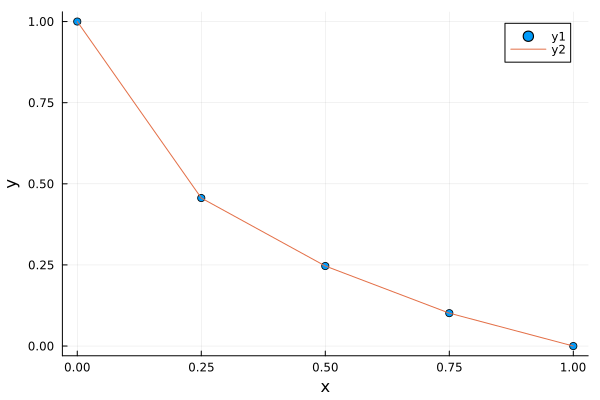

In [ ]:

begin
    # Constants
    x1 = 1 / 4
    x2 = 2 / 4
    x3 = 3 / 4
    h = 1
    g = 9.8
    x = [0,1/4,2/4,3/4,1]
    f1(y1, y2, y3) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt(y3^2 + (x3 - h)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3) = ForwardDiff.derivative(y -> f1(y, y2, y3), y1)
    fdash2(y1, y2, y3) = ForwardDiff.derivative(y -> f1(y1, y, y3), y2)
    fdash3(y1, y2, y3) = ForwardDiff.derivative(y -> f1(y1, y2, y), y3)

    # Initial guess
    y0 = [0.1, 0.0, 0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3]), fdash2(y[1], y[2], y[3]), fdash3(y[1], y[2], y[3])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.0001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end


Solution found: [0.5235699510493174, 0.32940796949173234, 0.18759424907565772, 0.08041528149947132]
0.5908194273954204


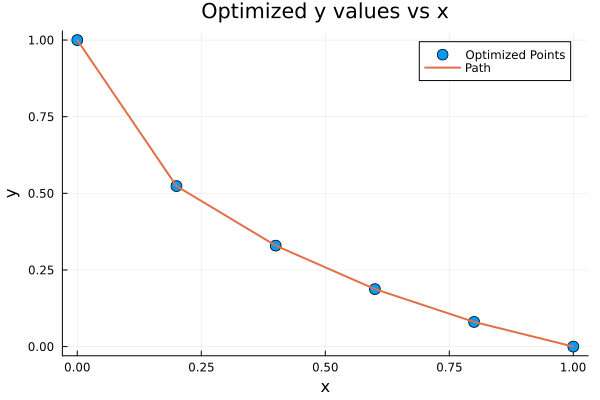

In [ ]:

begin
    # Constants
    x1 = 1 / 5
    x2 = 2 / 5
    x3 = 3 / 5
    x4 = 4 / 5
    h = 1
    g = 9.8
    x = [0, 1/5, 2/5, 3/5, 4/5, 1]
    f1(y1, y2, y3, y4) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt((y3 - y4)^2 + (x3 - x4)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * (h - y4))) +
             sqrt(y4^2 + (x4 - h)^2) / (sqrt(2 * g * (h - y4)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3, y4) = ForwardDiff.derivative(y -> f1(y, y2, y3, y4), y1)
    fdash2(y1, y2, y3, y4) = ForwardDiff.derivative(y -> f1(y1, y, y3, y4), y2)
    fdash3(y1, y2, y3, y4) = ForwardDiff.derivative(y -> f1(y1, y2, y, y4), y3)
    fdash4(y1, y2, y3, y4) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y), y4)

    # Initial guess
    y0 = [0.1, 0.0, 0.0, 0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3], y[4]), fdash2(y[1], y[2], y[3], y[4]), fdash3(y[1], y[2], y[3], y[4]),fdash4(y[1], y[2], y[3], y[4])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.00001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3],y0[4]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0, label="Optimized Points", xlabel="x", ylabel="y", title="Optimized y values vs x", legend=:topright, markersize=6)
    plot!(x, y0, label="Path", lw=2)
end


Solution found: [0.5734173596509639, 0.39324782883936416, 0.2577421044221811, 0.1511988062459566, 0.06657770786413764]
0.589449468181657


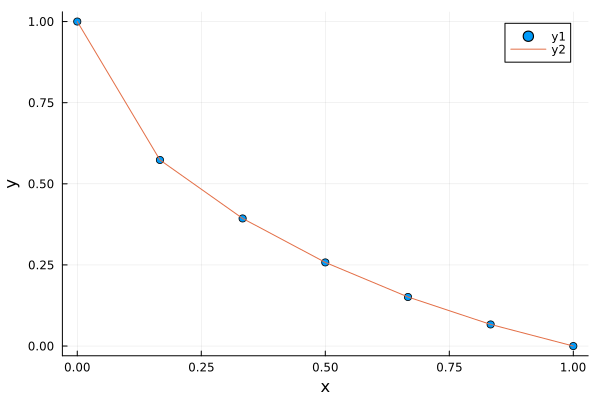

In [ ]:

begin
    # Constants
    x1 = 1 / 6
    x2 = 2 / 6
    x3 = 3 / 6
    x4 = 4 / 6
    x5 = 5 / 6
    h = 1
    g = 9.8
    x = [0,1/6, 2/6, 3/6, 4/6, 5/6,1]
    f1(y1, y2, y3, y4, y5) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt((y3 - y4)^2 + (x3 - x4)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * (h - y4))) +
             sqrt((y4 - y5)^2 + (x4 - x5)^2) / (sqrt(2 * g * (h - y4)) + sqrt(2 * g * (h - y5))) +
             sqrt(y5^2 + (x5 - h)^2) / (sqrt(2 * g * (h - y5)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3, y4, y5) = ForwardDiff.derivative(y -> f1(y, y2, y3, y4, y5), y1)
    fdash2(y1, y2, y3, y4, y5) = ForwardDiff.derivative(y -> f1(y1, y, y3, y4, y5), y2)
    fdash3(y1, y2, y3, y4, y5) = ForwardDiff.derivative(y -> f1(y1, y2, y, y4, y5), y3)
    fdash4(y1, y2, y3, y4, y5) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y, y5), y4)
    fdash5(y1, y2, y3, y4, y5) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y), y5)

    # Initial guess
    y0 = [0.1, 0.0, 0.0, 0.0,0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3], y[4], y[5]), fdash2(y[1], y[2], y[3], y[4], y[5]), fdash3(y[1], y[2], y[3], y[4], y[5]),fdash4(y[1], y[2], y[3], y[4],y[5]),fdash5(y[1], y[2], y[3], y[4], y[5])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.00001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3],y0[4],y0[5]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end


Solution found: [0.6119661574941366, 0.4439587107460486, 0.3151842286348288, 0.21149889117840776, 0.1265419390849585, 0.056774678985385435]
0.5884935513673226


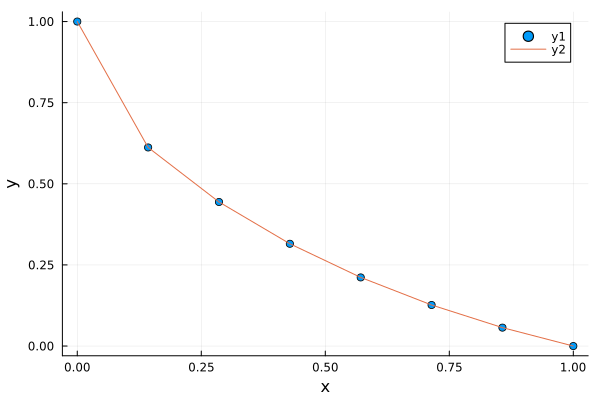

In [ ]:

begin
    # Constants
    x1 = 1 / 7
    x2 = 2 / 7
    x3 = 3 / 7
    x4 = 4 / 7
    x5 = 5 / 7
    x6 = 6 / 7
    h = 1
    g = 9.8
    x = [0,1/7, 2/7, 3/7, 4/7, 5/7, 6/7,1]
    f1(y1, y2, y3, y4, y5, y6) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt((y3 - y4)^2 + (x3 - x4)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * (h - y4))) +
             sqrt((y4 - y5)^2 + (x4 - x5)^2) / (sqrt(2 * g * (h - y4)) + sqrt(2 * g * (h - y5))) +
             sqrt((y5 - y6)^2 + (x5 - x6)^2) / (sqrt(2 * g * (h - y5)) + sqrt(2 * g * (h - y6))) +
             sqrt(y6^2 + (x6 - h)^2) / (sqrt(2 * g * (h - y6)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3, y4, y5, y6) = ForwardDiff.derivative(y -> f1(y, y2, y3, y4, y5, y6), y1)
    fdash2(y1, y2, y3, y4, y5, y6) = ForwardDiff.derivative(y -> f1(y1, y, y3, y4, y5, y6), y2)
    fdash3(y1, y2, y3, y4, y5, y6) = ForwardDiff.derivative(y -> f1(y1, y2, y, y4, y5, y6), y3)
    fdash4(y1, y2, y3, y4, y5, y6) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y, y5, y6), y4)
    fdash5(y1, y2, y3, y4, y5, y6) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y, y6), y5)
    fdash6(y1, y2, y3, y4, y5, y6) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y), y6)

    # Initial guess
    y0 = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3], y[4], y[5], y[6]), fdash2(y[1], y[2], y[3], y[4], y[5], y[6]), fdash3(y[1], y[2], y[3], y[4], y[5], y[6]),fdash4(y[1], y[2], y[3], y[4],y[5], y[6]),fdash5(y[1], y[2], y[3], y[4], y[5], y[6]), fdash6(y[1], y[2], y[3], y[4], y[5], y[6])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.00001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3],y0[4],y0[5],y0[6]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end


Solution found: [0.6428303579372434, 0.4853090729346118, 0.36295250805483953, 0.2628534303635229, 0.17920285227424634, 0.10875479991531424, 0.04947544675184273]
0.5877891193545801


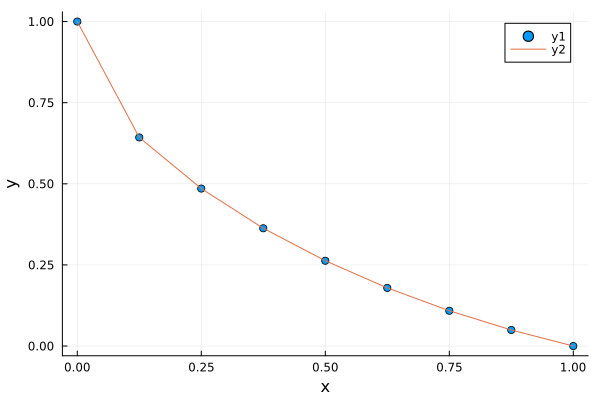

In [ ]:

begin
    # Constants
    x1 = 1 / 8
    x2 = 2 / 8
    x3 = 3 / 8
    x4 = 4 / 8
    x5 = 5 / 8
    x6 = 6 / 8
    x7 = 7 / 8
    h = 1
    g = 9.8
    x = [0,1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8,1]
    f1(y1, y2, y3, y4, y5, y6, y7) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt((y3 - y4)^2 + (x3 - x4)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * (h - y4))) +
             sqrt((y4 - y5)^2 + (x4 - x5)^2) / (sqrt(2 * g * (h - y4)) + sqrt(2 * g * (h - y5))) +
             sqrt((y5 - y6)^2 + (x5 - x6)^2) / (sqrt(2 * g * (h - y5)) + sqrt(2 * g * (h - y6))) +
             sqrt((y6 - y7)^2 + (x6 - x7)^2) / (sqrt(2 * g * (h - y6)) + sqrt(2 * g * (h - y7))) +
             sqrt(y7^2 + (x7 - h)^2) / (sqrt(2 * g * (h - y7)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3, y4, y5, y6, y7) = ForwardDiff.derivative(y -> f1(y, y2, y3, y4, y5, y6, y7), y1)
    fdash2(y1, y2, y3, y4, y5, y6, y7) = ForwardDiff.derivative(y -> f1(y1, y, y3, y4, y5, y6, y7), y2)
    fdash3(y1, y2, y3, y4, y5, y6, y7) = ForwardDiff.derivative(y -> f1(y1, y2, y, y4, y5, y6, y7), y3)
    fdash4(y1, y2, y3, y4, y5, y6, y7) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y, y5, y6, y7), y4)
    fdash5(y1, y2, y3, y4, y5, y6, y7) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y, y6, y7), y5)
    fdash6(y1, y2, y3, y4, y5, y6, y7) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y, y7), y6)
    fdash7(y1, y2, y3, y4, y5, y6, y7) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y), y7)
    # Initial guess
    y0 = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3], y[4], y[5], y[6], y[7]), fdash2(y[1], y[2], y[3], y[4], y[5], y[6], y[7]), fdash3(y[1], y[2], y[3], y[4], y[5], y[6], y[7]),fdash4(y[1], y[2], y[3], y[4],y[5], y[6], y[7]),fdash5(y[1], y[2], y[3], y[4], y[5], y[6], y[7]), fdash6(y[1], y[2], y[3], y[4], y[5], y[6], y[7]), fdash7(y[1], y[2], y[3], y[4], y[5], y[6], y[7])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.00001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3],y0[4],y0[5],y0[6],y0[7]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end


Solution found: [0.6681992205824632, 0.5197559828636533, 0.40330061537855116, 0.30693165386508503, 0.22529368913360695, 0.1553879559848338, 0.09532667726398306, 0.0438325712822537]
0.5872487471717756


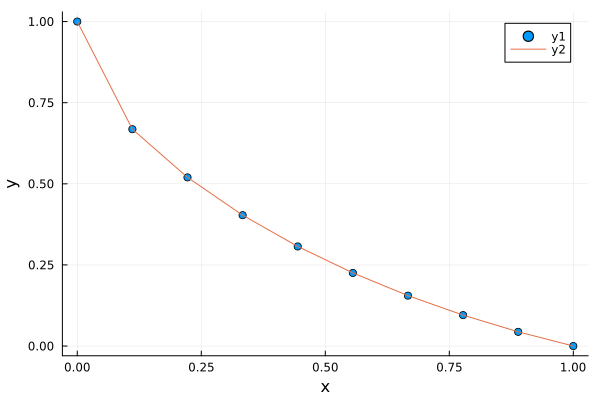

In [ ]:

begin
    # Constants
    x1 = 1 / 9
    x2 = 2 / 9
    x3 = 3 / 9
    x4 = 4 / 9
    x5 = 5 / 9
    x6 = 6 / 9
    x7 = 7 / 9
    x8 = 8 / 9
    h = 1
    g = 9.8
    x = [0,1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 1]
    f1(y1, y2, y3, y4, y5, y6, y7, y8) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt((y3 - y4)^2 + (x3 - x4)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * (h - y4))) +
             sqrt((y4 - y5)^2 + (x4 - x5)^2) / (sqrt(2 * g * (h - y4)) + sqrt(2 * g * (h - y5))) +
             sqrt((y5 - y6)^2 + (x5 - x6)^2) / (sqrt(2 * g * (h - y5)) + sqrt(2 * g * (h - y6))) +
             sqrt((y6 - y7)^2 + (x6 - x7)^2) / (sqrt(2 * g * (h - y6)) + sqrt(2 * g * (h - y7))) +
             sqrt((y7 - y8)^2 + (x7 - x8)^2) / (sqrt(2 * g * (h - y7)) + sqrt(2 * g * (h - y8))) +
             sqrt(y8^2 + (x8 - h)^2) / (sqrt(2 * g * (h - y8)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y, y2, y3, y4, y5, y6, y7, y8), y1)
    fdash2(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y1, y, y3, y4, y5, y6, y7, y8), y2)
    fdash3(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y1, y2, y, y4, y5, y6, y7, y8), y3)
    fdash4(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y, y5, y6, y7, y8), y4)
    fdash5(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y, y6, y7, y8), y5)
    fdash6(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y, y7, y8), y6)
    fdash7(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y, y8), y7)
    fdash8(y1, y2, y3, y4, y5, y6, y7, y8) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y7, y), y8)
    # Initial guess
    y0 = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]), fdash2(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]), fdash3(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]),fdash4(y[1], y[2], y[3], y[4],y[5], y[6], y[7], y[8]),fdash5(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]), fdash6(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]), fdash7(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8]), fdash8(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.00001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3],y0[4],y0[5],y0[6],y0[7],y0[8]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end


Solution found: [0.6894726722628883, 0.5489506347155126, 0.4378562988395032, 0.3451238211051207, 0.26577663042926136, 0.19702541080306257, 0.13710970858111626, 0.08483287978730923, 0.039340171773004716]
0.5868212643239931


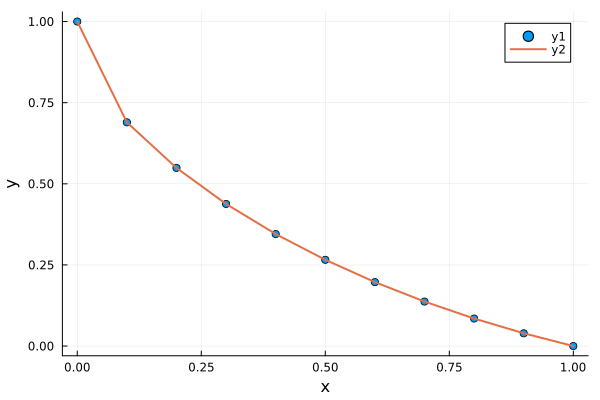

In [ ]:

begin
    # Constants
    x1 = 1 / 10
    x2 = 2 / 10
    x3 = 3 / 10
    x4 = 4 / 10
    x5 = 5 / 10
    x6 = 6 / 10
    x7 = 7 / 10
    x8 = 8 / 10
    x9 = 9 / 10
    h = 1
    g = 9.8
    x = [0,1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 1]
    f1(y1, y2, y3, y4, y5, y6, y7, y8, y9) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt((y3 - y4)^2 + (x3 - x4)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * (h - y4))) +
             sqrt((y4 - y5)^2 + (x4 - x5)^2) / (sqrt(2 * g * (h - y4)) + sqrt(2 * g * (h - y5))) +
             sqrt((y5 - y6)^2 + (x5 - x6)^2) / (sqrt(2 * g * (h - y5)) + sqrt(2 * g * (h - y6))) +
             sqrt((y6 - y7)^2 + (x6 - x7)^2) / (sqrt(2 * g * (h - y6)) + sqrt(2 * g * (h - y7))) +
             sqrt((y7 - y8)^2 + (x7 - x8)^2) / (sqrt(2 * g * (h - y7)) + sqrt(2 * g * (h - y8))) +
             sqrt((y8 - y9)^2 + (x8 - x9)^2) / (sqrt(2 * g * (h - y8)) + sqrt(2 * g * (h - y9))) +
             sqrt(y9^2 + (x9 - h)^2) / (sqrt(2 * g * (h - y9)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y, y2, y3, y4, y5, y6, y7, y8, y9), y1)
    fdash2(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y, y3, y4, y5, y6, y7, y8, y9), y2)
    fdash3(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y2, y, y4, y5, y6, y7, y8, y9), y3)
    fdash4(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y, y5, y6, y7, y8, y9), y4)
    fdash5(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y, y6, y7, y8, y9), y5)
    fdash6(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y, y7, y8, y9), y6)
    fdash7(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y, y8, y9), y7)
    fdash8(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y7, y, y9), y8)
    fdash9(y1, y2, y3, y4, y5, y6, y7, y8, y9) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y7, y8, y), y9)
    # Initial guess
    y0 = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9]), fdash2(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9]), fdash3(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9]),fdash4(y[1], y[2], y[3], y[4],y[5], y[6], y[7], y[8],y[9]),fdash5(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9]), fdash6(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9]), fdash7(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9]), fdash8(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9]), fdash9(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.00001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3],y0[4],y0[5],y0[6],y0[7],y0[8],y0[9]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0, lw=2)
end


Solution found: [0.7076310702808293, 0.5740730514719964, 0.46783021167517, 0.378542556741828, 0.3015543695340222, 0.23425520188825721, 0.1749950985426393, 0.12264945225804383, 0.07641143472170746, 0.0356809280278436]
0.5864747433228177


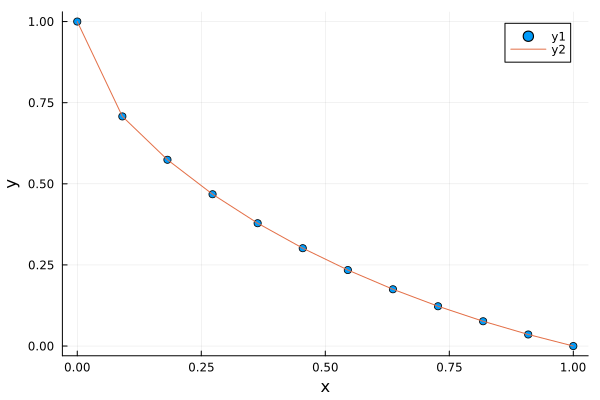

In [ ]:

begin
    # Constants
    x1 = 1 / 11
    x2 = 2 / 11
    x3 = 3 / 11
    x4 = 4 / 11
    x5 = 5 / 11
    x6 = 6 / 11
    x7 = 7 / 11
    x8 = 8 / 11
    x9 = 9 / 11
    x10 = 10 / 11
    h = 1
    g = 9.8
    x = [0,1/11, 2/11, 3/11, 4/11, 5/11, 6/11, 7/11, 8/11, 9/11, 10/11,1]
    f1(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = sqrt(x1^2 + (y1 - h)^2) / sqrt(2 * g * (h - y1)) +
             sqrt((x1 - x2)^2 + (y1 - y2)^2) / (sqrt(2 * g * (h - y1)) + sqrt(2 * g * (h - y2))) +
             sqrt((y2 - y3)^2 + (x2 - x3)^2) / (sqrt(2 * g * (h - y2)) + sqrt(2 * g * (h - y3))) +
             sqrt((y3 - y4)^2 + (x3 - x4)^2) / (sqrt(2 * g * (h - y3)) + sqrt(2 * g * (h - y4))) +
             sqrt((y4 - y5)^2 + (x4 - x5)^2) / (sqrt(2 * g * (h - y4)) + sqrt(2 * g * (h - y5))) +
             sqrt((y5 - y6)^2 + (x5 - x6)^2) / (sqrt(2 * g * (h - y5)) + sqrt(2 * g * (h - y6))) +
             sqrt((y6 - y7)^2 + (x6 - x7)^2) / (sqrt(2 * g * (h - y6)) + sqrt(2 * g * (h - y7))) +
             sqrt((y7 - y8)^2 + (x7 - x8)^2) / (sqrt(2 * g * (h - y7)) + sqrt(2 * g * (h - y8))) +
             sqrt((y8 - y9)^2 + (x8 - x9)^2) / (sqrt(2 * g * (h - y8)) + sqrt(2 * g * (h - y9))) +
             sqrt((y9 - y10)^2 + (x9 - x10)^2) / (sqrt(2 * g * (h - y9)) + sqrt(2 * g * (h - y10))) +
             sqrt(y10^2 + (x10 - h)^2) / (sqrt(2 * g * (h - y10)) + sqrt(2 * g * h))

# Derivative functions
    fdash1(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y, y2, y3, y4, y5, y6, y7, y8, y9, y10), y1)
    fdash2(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y, y3, y4, y5, y6, y7, y8, y9, y10), y2)
    fdash3(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y, y4, y5, y6, y7, y8, y9, y10), y3)
    fdash4(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y, y5, y6, y7, y8, y9, y10), y4)
    fdash5(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y, y6, y7, y8, y9, y10), y5)
    fdash6(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y, y7, y8, y9, y10), y6)
    fdash7(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y, y8, y9, y10), y7)
    fdash8(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y7, y, y9, y10), y8)
    fdash9(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y7, y8, y, y10), y9)
    fdash10(y1, y2, y3, y4, y5, y6, y7, y8, y9, y10) = ForwardDiff.derivative(y -> f1(y1, y2, y3, y4, y5, y6, y7, y8, y9, y), y10)
    # Initial guess
    y0 = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    # Function to return the vector of derivatives
    f0(y) = [fdash1(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]), fdash2(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]), fdash3(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]),fdash4(y[1], y[2], y[3], y[4],y[5], y[6], y[7], y[8],y[9], y[10]),fdash5(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]), fdash6(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]), fdash7(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]), fdash8(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]), fdash9(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10]), fdash10(y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8],y[9], y[10])]

    # Newton's method loop
    while true
        J = ForwardDiff.jacobian(f0, y0)  # Recompute Jacobian
        if norm(f0(y0)) < 0.00001  # Check the norm of the function
            println("Solution found: ", y0)
            println(2*f1(y0[1],y0[2],y0[3],y0[4],y0[5],y0[6],y0[7],y0[8],y0[9],y0[10]))
            break
        else
            y0 = y0 -inv(J) * f0(y0)
        end
    end
    y0 = vcat(1, y0, 0)
    scatter(x, y0,xlabel="x", ylabel="y")
    plot!(x, y0)
end


In [4]:
import Pkg; Pkg.add("Roots")

    Updating registry at `C:\Users\SANTHOSHI\.julia\registries\General.toml`
   Resolving package versions...
   Installed Accessors ──────── v0.1.42
   Installed CompositionsBase ─ v0.1.2
   Installed CommonSolve ────── v0.2.4
   Installed ConstructionBase ─ v1.5.8
   Installed InverseFunctions ─ v0.1.17
   Installed Roots ──────────── v2.2.6
    Updating `C:\Users\SANTHOSHI\.julia\environments\v1.11\Project.toml`
  [f2b01f46] + Roots v2.2.6
    Updating `C:\Users\SANTHOSHI\.julia\environments\v1.11\Manifest.toml`
  [7d9f7c33] + Accessors v0.1.42
  [38540f10] + CommonSolve v0.2.4
  [a33af91c] + CompositionsBase v0.1.2
  [187b0558] + ConstructionBase v1.5.8
  [3587e190] + InverseFunctions v0.1.17
  [f2b01f46] + Roots v2.2.6
Precompiling project...
  58956.4 ms  ✓ InverseFunctions
  40932.6 ms  ✓ CompositionsBase
  40956.1 ms  ✓ CommonSolve
   2099.7 ms  ✓ ConstructionBase
   4411.7 ms  ✓ InverseFunctions → InverseFunctionsDatesExt
   9348.2 ms  ✓ InverseFunctions → InverseFunctionsTest

Solution: theta = 1.671223469580877e-5


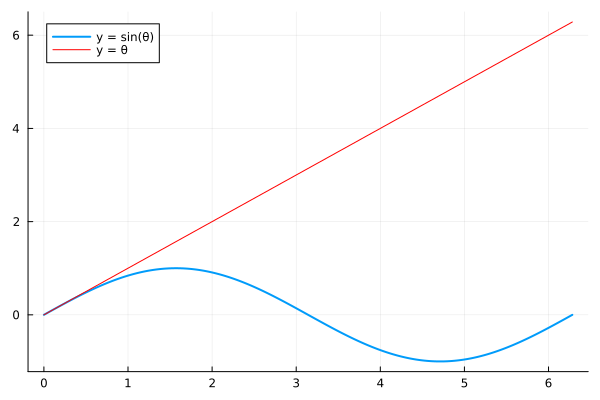

In [ ]:
using Roots

begin
    f(theta) = sin(theta) - theta
    theta_solution = find_zero(f, 0.5)  # Initial guess

    println("Solution: theta = ", theta_solution)
 
    theta = range(0, 2π, length=400)
    plot(theta, sin.(theta), label="y = sin(θ)", lw=2)
    plot!(theta, theta, color=:red, label="y = θ")
end

Any[[2.7768, 2.77681]_trv_NG, ∅_trv_NG, Any[]]
2.7768018991320433
0.5729170373653043
-1.799871955703269


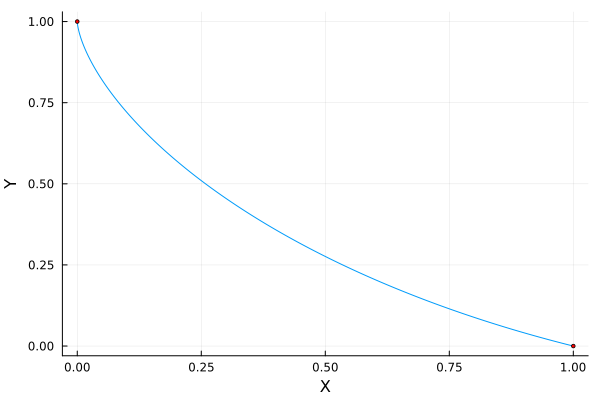

In [ ]:
begin

    f(theta_f) = 1 + cos(2 * theta_f) - (2 * theta_f - π + sin(2 * theta_f))
    fdash(theta_f) = ForwardDiff.derivative(f, theta_f);

    N(X, Y) = mid(X) - f(mid(X))*Y;

    function IntervalNewtonExtendedDiv(Xtemp)

        Xold, Xnew, Z = [], [], [];

        if in_interval(0, fdash(Xtemp))
            Z = extended_div(interval(1, 1), fdash(Xtemp));
            Y1 = intersect_interval(Xtemp, N(Xtemp, Z[1]));
            if !isempty_interval(Y1)
                IntervalNewtonExtendedDiv(Y1);
            end

            Y2 = intersect_interval(Xtemp, N(Xtemp, Z[2]));
            if !isempty_interval(Y2)
                IntervalNewtonExtendedDiv(Y2);
            end

        else
            Xold = Xtemp;
            while diam(Xold) > 0.0001
                Xnew = intersect_interval(Xold, N(Xold, 1/fdash(Xold)));
                Xold = Xnew;
            end
            push!(solution, Xnew);
            # return
        end
    end
    solution = [];
    X0 = interval( π/2, 2* π);
    IntervalNewtonExtendedDiv(X0);
    println(solution)

    theta_f = mid(solution[1])
    println(theta_f)
    c1 = 1 / (1 + cos(2 * theta_f))
    println(c1)
    c2 = -c1 * π
    println(c2)
    theta = range(π/2, theta_f, length=1000)
    x = c1 .* (2 .* theta .+ sin.(2 .* theta)) .+ c2
    y = 1 .- c1 .* (1 .+ cos.(2 .* theta))
    plot(x, y, xlabel="X", ylabel="Y", legend=false)
    scatter!([1,0], [0,1], color=:red, markersize=2, label="Start & End Points")
end



In [4]:
begin
    θ0 = π/2
    θf = 2.7768018991320433
    local n = 10000; # mince
    local θ = mince(interval(θ0, θf), n)
    c1 = 1 / (1 + cos(2 * θf))
    c2 = -c1 * π
    y(θ) =  1 - c1*(1 + cos(2*θ));
    dydθ(θ) = c1*2*sin(2*θ);
    dxdθ(θ) = c1*(2 + 2*cos(2*θ));
    f = (√(8*c1)*(θf - θ0)/√(2*9.81))
    @show f
    sum( .√( ((dxdθ.(θ)).^2 .+ (dydθ.(θ)).^2) ./ (1 .- y.(θ)) ) .* diam.(θ) ) /  √(2*9.81)
end

f = 0.58289546325392


[0.582334, ∞)_trv_NG

In [1]:
begin
    theta = π/2
    θf = 2.7768018991320433
    c1 = 1 / (1 + cos(2 * θf))
    c2 = -c1 * π
    x = c1 * (2 * theta + sin(2 * theta)) + c2
    yv = 1 - c1 * (1 + cos(2 * theta))
    println(x)
    println(yv)
    x1 = c1 * (2 * θf + sin(2 * θf)) + c2
    yv1 = 1 - c1 * (1 + cos(2 * θf))
    println(c1)
    println(yv1)
end

0.0
1.0
0.5729170373653043
0.0
